<a href="https://colab.research.google.com/github/xuxiufeng/Blockchain_Simulation_Multiple_Hackers_with_Resetting_Times/blob/main/Exponential-Exponential-Exponential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(1)

In [ ]:
k = 5

Generate $k$ $\lambda$s: $\lambda_1, \dots, \lambda_k$.

In [ ]:
lambda_list = np.random.uniform(7,9,k)
lambda_list

array([7.04061456, 8.44319485, 8.7226834 , 7.49492496, 8.78709396])

For $X\sim Exp(\lambda_j)$, we have
\begin{eqnarray*}
f(x)=\lambda_j e^{-\lambda_j x }, \quad x>0.
\end{eqnarray*}

In [16]:
def ET_m(m, lambda_list, delta, eta):
    def Generate_Z(m, lambda_list):
        sum_of_x_list = []
        for i in range(len(lambda_list)):
            sum_of_x_list.append(np.sum(np.random.exponential(1/lambda_list[i], m)))
        Z = min(sum_of_x_list)
        return Z
    def T_m(m, lambda_list, delta, eta):
        sum_of_time = 0
        sum_of_w = 0
        y = np.random.exponential(1/delta)
        w = np.random.exponential(1/eta)
        Z_m = Generate_Z(m, lambda_list)
        while Z_m > y:
            sum_of_time = sum_of_time + y + w
            sum_of_w += w
            Z_m = Generate_Z(m, lambda_list)
            y = np.random.exponential(1/delta)
            w = np.random.exponential(1/eta)
        return sum_of_time + Z_m, sum_of_w

    ET = np.repeat(np.nan, m)
    sum_w = np.repeat(np.nan, m)
    for i in range(m):
        T_0 = 0
        W_0 = 0
        iter = 30000 # iter 30000
        for j in range(iter):
            T_0 += T_m(i+1, lambda_list, delta, eta)[0]
            W_0 += T_m(i+1, lambda_list, delta, eta)[1]
        ET[i] = T_0/iter
        sum_w[i] = W_0/iter
        print(ET[i])
    return ET, sum_w

0.04258939264843055
0.1437440153323397
0.2687309053202253
0.42628524627871694
0.5778637443551876
0.7580899837551506
0.9334134276303688
1.1437593958974948
1.3304213972553454
1.5129677325809934
1.744013713781258
1.9632435695507466
2.20264521517421
2.4465727866934657
2.7216950103396416
2.9668316888311064
3.2773095564669896
3.5529517405896986
3.88846297092683
4.164133726274624
4.475698019410797
4.804229502269221
5.133255565369498
5.5061760030826195
5.905456270526096
6.2581998146446285
6.735073567528523
7.092493432226505
7.563411474786768
7.979350309237817
8.447900989075272
8.882977003329538
9.487723127663081
10.002849859874528
10.560550891702988
11.11640229459114
11.683753693683585
12.285824563055156
12.808014760928238
13.500889471179205


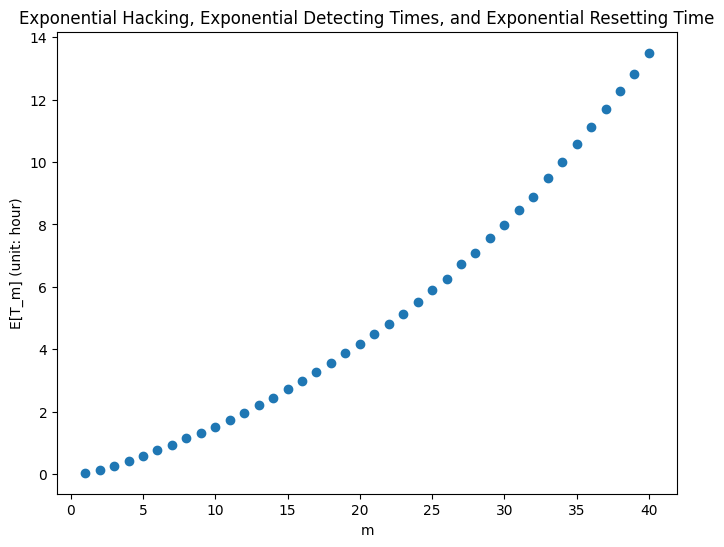

In [17]:
m = 40
delta = 1/3
eta = 1/2
ET_m, sum_w = ET_m(m, lambda_list, delta, eta)
fig = plt.figure(figsize=(8, 6))
plt.scatter(range(1, m+1), ET_m)
plt.xlabel(r'm')
plt.ylabel(r'E[T_m] (unit: hour)')
plt.title('Exponential Hacking, Exponential Detecting Times, and Exponential Resetting Time')
plt.show()

In [18]:
R = [1.2*c for c in range(1, m+1)]
C_2 = [.5*c**1.3 for c in range(1, m+1)]
C_1 = [.22*c**.8  for c in range(1, m+1)]
E_mNR = np.repeat(np.nan, len(ET_m))
for j in range(m):
  E_mNR[j] = ((ET_m[j]-sum_w[j])*(R[j] - C_2[j]) - C_1[j]*sum_w[j])/ET_m[j]
m_max = np.where(E_mNR == max(E_mNR))[0][0] + 1
print(m_max, max(E_mNR))
E_mNR

6 0.8860567518618722


array([ 0.37087234,  0.56857733,  0.6676789 ,  0.80174499,  0.84612461,
        0.88605675,  0.8761128 ,  0.81672569,  0.75575622,  0.61741886,
        0.54152014,  0.38969172,  0.2476679 ,  0.08418307, -0.09524291,
       -0.33319422, -0.54259693, -0.78427954, -1.04128821, -1.30857814,
       -1.60075672, -1.8919347 , -2.2035809 , -2.51796609, -2.85476552,
       -3.20128671, -3.56338036, -3.92817077, -4.31203391, -4.69501538,
       -5.1021372 , -5.51420835, -5.92333156, -6.38352097, -6.85670164,
       -7.27206332, -7.71024183, -8.1827966 , -8.66797951, -9.20237738])

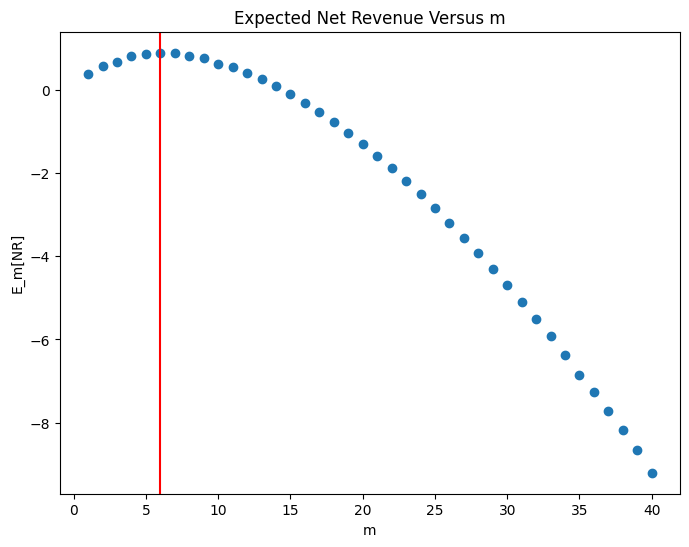

In [19]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(range(1, m+1), E_mNR)
plt.axvline(x = m_max, c='red')
plt.xlabel(r'm')
plt.ylabel(r'E_m[NR]')
plt.title(r'Expected Net Revenue Versus m')
plt.show()